In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()

train = pd.read_csv('train.csv')
sample = pd.read_csv('sample.csv')

Saving sample.csv to sample.csv
Saving train.csv to train.csv


In [6]:
train.info(memory_usage='deep') 
train['datetime'].unique()

train['total']=train['total'].fillna(method='ffill')
train['total']=train['total'].fillna(train['total'].mean())


sample['day'] = 0
sample['month'] = 0
sample['year'] = 0
sample['time'] = 0

for index, row in train.iterrows():
  train.loc[index, 'day']= str(re.findall(r'^..', train.loc[index, 'datetime']))
  train.loc[index, 'month']=str(re.findall(r'[.][0-1][1-9][.]', train.loc[index, 'datetime']))
  train.loc[index, 'year']=str(re.findall(r'.... ', train.loc[index, 'datetime']))
  train.loc[index, 'time']=str(re.findall(r' ........', train.loc[index, 'datetime']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   total     35064 non-null  float64
 2   day       35064 non-null  int64  
 3   month     35064 non-null  int64  
 4   year      35064 non-null  int64  
 5   time      35064 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 3.9 MB


In [7]:
train=train.drop(['datetime'],axis=1)
le = LabelEncoder()
label = le.fit_transform(train['day'])


train.drop("day", axis=1, inplace=True)
train["day"] = label
le = LabelEncoder()
label = le.fit_transform(train['month'])


train.drop("month", axis=1, inplace=True)
train["month"] = label
le = LabelEncoder()
label = le.fit_transform(train['year'])

train.drop("year", axis=1, inplace=True)
train["year"] = label
le = LabelEncoder()
label = le.fit_transform(train['time'])

train.drop("time", axis=1, inplace=True)
train["time"] = label

train['total']=pd.to_numeric(train['total'])
train['total']=round(train['total'])
train


,total,day,month,year,time
0,185144.0,0,0,0,0
1,154140.0,0,0,0,1
2,157818.0,0,0,0,2
3,149311.0,0,0,0,3
4,138282.0,0,0,0,4
...,...,...,...,...,...
35059,249376.0,30,10,3,19
35060,246511.0,30,10,3,20
35061,226469.0,30,10,3,21
35062,199907.0,30,10,3,22


In [8]:
X = train.drop(['total'], axis = 1)
y = train['total']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

X_st

array([[-1.67380491, -1.60078063, -1.34219223, -1.66132477],
       [-1.67380491, -1.60078063, -1.34219223, -1.51686175],
       [-1.67380491, -1.60078063, -1.34219223, -1.37239873],
       ...,
       [ 1.73525035,  1.29620995,  1.34035613,  1.37239873],
       [ 1.73525035,  1.29620995,  1.34035613,  1.51686175],
       [ 1.73525035,  1.29620995,  1.34035613,  1.66132477]])

In [9]:
X = train[['day', 'month', 'year', 'time']].values

y = train['total'].values

In [10]:
features = pd.Series(['day', 'month', 'year', 'time'])
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,84.836221,day
1,-758.721302,month
2,-8055.230927,year
3,4433.629308,time


In [11]:
X = train[['time']].values
y = train['total'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [4433.6293075]
Intercept: 134157.71699064568


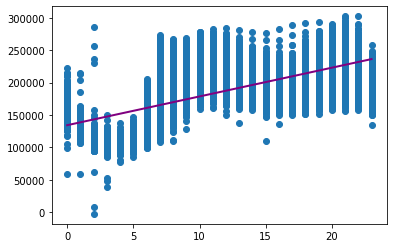

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 1130605527.230


In [14]:
sample.info() 
sample['total'].unique()

import re
for index, row in sample.iterrows():
  sample.loc[index, 'day']= str(re.findall(r'^..', sample.loc[index, 'datetime']))
  sample.loc[index, 'month']=str(re.findall(r'[.][0-1][1-9][.]', sample.loc[index, 'datetime']))
  sample.loc[index, 'year']=str(re.findall(r'.... ', sample.loc[index, 'datetime']))
  sample.loc[index, 'time']=str(re.findall(r' ........', sample.loc[index, 'datetime']))
sample

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  4344 non-null   object
 1   total     4344 non-null   int64 
 2   day       4344 non-null   int64 
 3   month     4344 non-null   int64 
 4   year      4344 non-null   int64 
 5   time      4344 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 203.8+ KB


,datetime,total,day,month,year,time
0,01.01.2009 00:00:00,0,['01'],['.01.'],['2009 '],[' 00:00:00']
1,01.01.2009 01:00:00,0,['01'],['.01.'],['2009 '],[' 01:00:00']
2,01.01.2009 02:00:00,0,['01'],['.01.'],['2009 '],[' 02:00:00']
3,01.01.2009 03:00:00,0,['01'],['.01.'],['2009 '],[' 03:00:00']
4,01.01.2009 04:00:00,0,['01'],['.01.'],['2009 '],[' 04:00:00']
...,...,...,...,...,...,...
4339,30.06.2009 19:00:00,0,['30'],['.06.'],['2009 '],[' 19:00:00']
4340,30.06.2009 20:00:00,0,['30'],['.06.'],['2009 '],[' 20:00:00']
4341,30.06.2009 21:00:00,0,['30'],['.06.'],['2009 '],[' 21:00:00']
4342,30.06.2009 22:00:00,0,['30'],['.06.'],['2009 '],[' 22:00:00']


In [15]:
le = LabelEncoder()
label = le.fit_transform(sample['day'])

sample.drop("day", axis=1, inplace=True)
sample["day"] = label
le = LabelEncoder()
label = le.fit_transform(sample['month'])

sample.drop("month", axis=1, inplace=True)
sample["month"] = label
le = LabelEncoder()
label = le.fit_transform(sample['year'])

sample.drop("year", axis=1, inplace=True)
sample["year"] = label
le = LabelEncoder()
label = le.fit_transform(sample['time'])

sample.drop("time", axis=1, inplace=True)
sample["time"] = label



In [24]:
X = sample.drop(['total','datetime'], axis = 1)
y = train['total']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

X_st

array([[-1.67162811, -1.46686867,  0.        , -1.66132477],
       [-1.67162811, -1.46686867,  0.        , -1.51686175],
       [-1.67162811, -1.46686867,  0.        , -1.37239873],
       ...,
       [ 1.64822659,  1.4571757 ,  0.        ,  1.37239873],
       [ 1.64822659,  1.4571757 ,  0.        ,  1.51686175],
       [ 1.64822659,  1.4571757 ,  0.        ,  1.66132477]])

In [25]:
X = sample[['day', 'month', 'year', 'time']].values
y = train['total'].values


In [26]:
features = pd.Series(['day', 'month', 'year', 'time'])
features

0      day
1    month
2     year
3     time
dtype: object